# Demo 6 - Clustering

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

signal = pd.read_csv('../signals/D05_signal.csv').values.flatten()

## Load signal and extract features

This part is equivalent to Demo 5. You'll be working on the analyses related to D05 and E05, to complete them with a correct spike sorting

In [5]:
from scipy.signal import find_peaks

pk_locs = find_peaks(np.abs(signal), height=0.3*np.max(np.abs(signal)), distance=60)[0]

spike_matrix = []
for p in pk_locs:
    spike_matrix.append(signal[p-30:p+30])
spike_matrix = np.asarray(spike_matrix).squeeze()

In [6]:
def peak2peak(shape_in):
    return np.ptp(shape_in)
def pos_peak(shape_in):
    return(np.max(shape_in))
def neg_peak(shape_in):
    return np.abs(np.min(shape_in))
def energy(shape_in):
    return np.sqrt(np.sum(shape_in**2))

def extract_features(shape_in, function_list):
    
    feat_out = [f(shape_in) for f in function_list]

    return np.asarray(feat_out)

feature_list = [peak2peak, pos_peak, neg_peak, energy]

In [8]:
features_all = []
for p in pk_locs:
    features_all.append(extract_features(signal[p-30:p+30], feature_list))
features_all = np.asarray(features_all)
print(features_all.shape)

(796, 4)


## Visualize 2D and 3D combinations of features

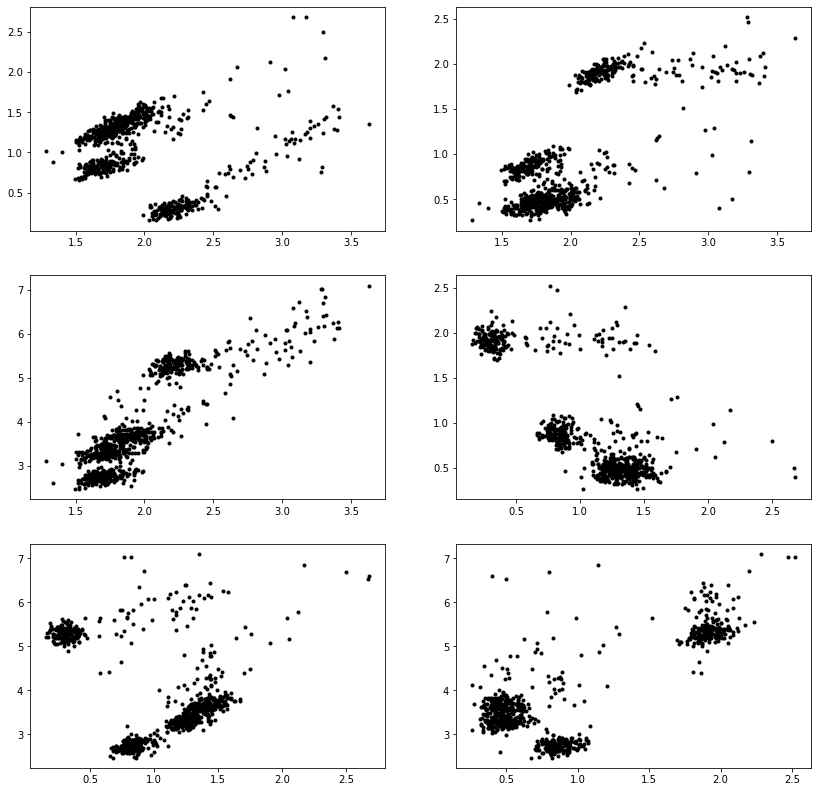

In [9]:
import itertools
from scipy.special import comb

n_plots = int(comb(features_all.shape[1],2))

fig, ax = plt.subplots(int(np.ceil(n_plots/2)),2,figsize=(14,14))

for i,c in enumerate(itertools.combinations(range(features_all.shape[1]),2)):
    row = int(i/2)
    col = int(i%2)
    ax[row,col].plot(features_all[:,c[0]], features_all[:,c[1]], 'k.')

plt.show()

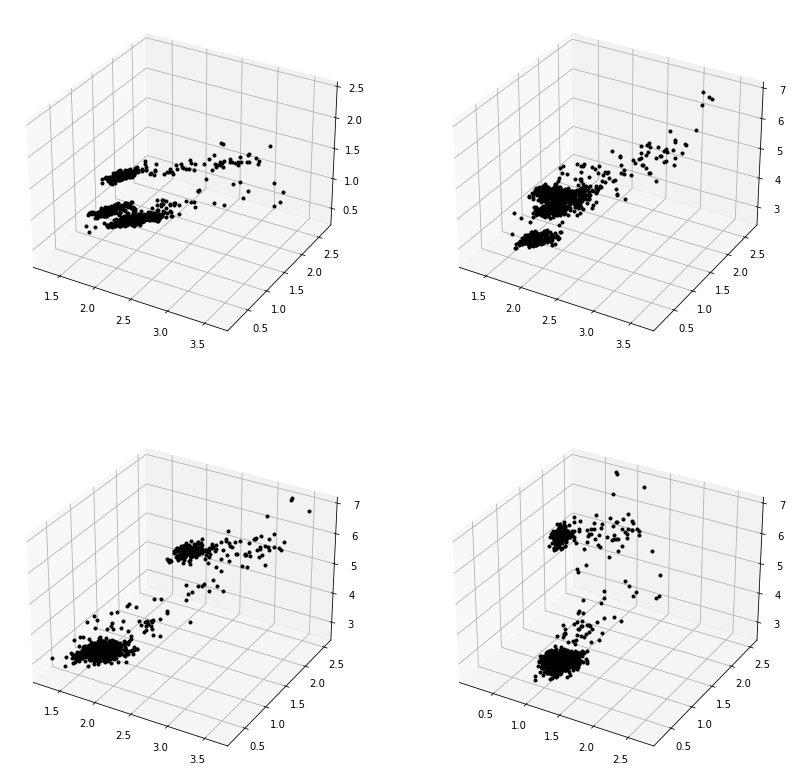

In [10]:
n_plots = int(comb(features_all.shape[1],3))

fig = plt.figure(figsize=(14,14))
n_rows = int(np.ceil(n_plots/2))
n_cols = 2

for i,c in enumerate(itertools.combinations(range(features_all.shape[1]),3)):
    ax = fig.add_subplot(n_rows, n_cols, i+1, projection='3d')
    ax.plot(features_all[:,c[0]], features_all[:,c[1]], features_all[:,c[2]], 'k.')

plt.show()

## K-means clustering

K-means clustering is included in `sklearn`. The `KMeans` object must me initialized, and then fit onto the feature matrix. Among the attributes of the fit clustering object, it is possible to find the centroids (`cluster_centers_`) and the clustering labels (`labels_`)

In [24]:
from sklearn.cluster import KMeans

n_neurons = 3

cluster = KMeans(n_clusters=n_neurons)

cluster.fit(features_all)

print(cluster.cluster_centers_.shape)
print(cluster.labels_.shape)

print(np.unique(cluster.labels_))

(3, 4)
(796,)
[0 1 2]


0
1
2


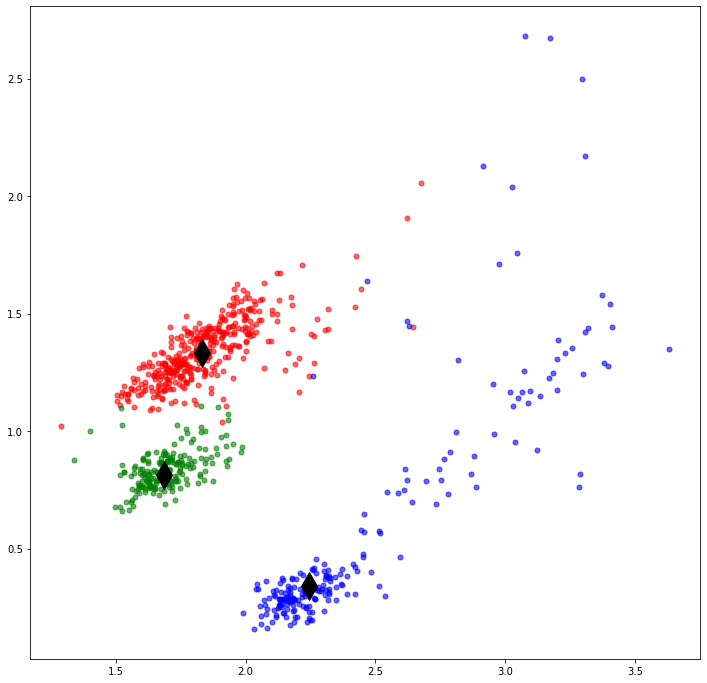

In [44]:
features_to_plot = [0,1]
c = ['r', 'b', 'g']

plt.figure(figsize=(12,12))

for i in range(n_neurons):
    idx_to_plot = np.where(cluster.labels_ == i)[0]
    print(i)
    plt.plot(features_all[idx_to_plot, features_to_plot[0]], features_all[idx_to_plot, features_to_plot[1]], '.', ms=10, c=c[i], alpha=0.6)
    plt.plot(cluster.cluster_centers_[i,features_to_plot[0]], cluster.cluster_centers_[i,features_to_plot[1]], 'd', c='k', ms=20)

plt.show()

## K-Medoids clustering

K-Medoids can be found in an additional package called `sklearn_extra`. To install it, use the `!pip install scikit-learn-extra` command. This is a standard command for installing Python packages on the fly inside a notebook. The object `KMedoids` works in exactly the same way as the `KMeans` object described before

In [39]:
!pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids

In [42]:
cluster = KMedoids(n_clusters=n_neurons)

cluster.fit(features_all)

print(cluster.cluster_centers_.shape)
print(cluster.labels_.shape)

print(np.unique(cluster.labels_))

(3, 4)
(796,)
[0 1 2]


0
1
2


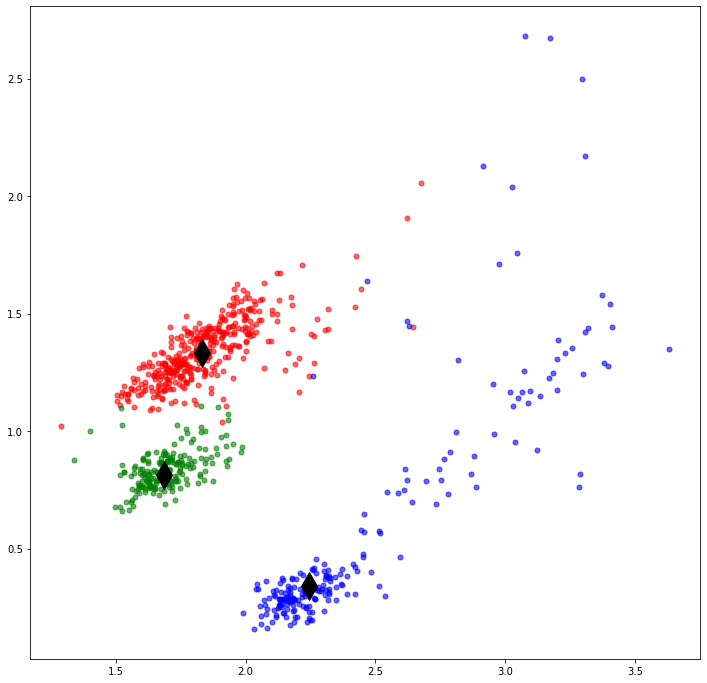

In [45]:
features_to_plot = [0,1]
c = ['r', 'b', 'g']

plt.figure(figsize=(12,12))

for i in range(n_neurons):
    idx_to_plot = np.where(cluster.labels_ == i)[0]
    print(i)
    plt.plot(features_all[idx_to_plot, features_to_plot[0]], features_all[idx_to_plot, features_to_plot[1]], '.', ms=10, c=c[i], alpha=0.6)
    plt.plot(cluster.cluster_centers_[i,features_to_plot[0]], cluster.cluster_centers_[i,features_to_plot[1]], 'd', c='k', ms=20)

plt.show()